In [ ]:
print("assalamualaikum")

In [1]:
import cv2

In [ ]:
img = cv2.imread("ronaldo.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
img.shape

In [ ]:
cv2.imshow("picture",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
grayImg = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) # convert RGB to grayscale

In [ ]:
grayImg.shape

In [ ]:
print(grayImg)

In [ ]:
plt.imshow(grayImg,'gray')

# Otsu thresholding

In [ ]:
# Otsu's thresholding
%matplotlib inline
ret2,th2 = cv2.threshold(grayImg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
plt.imshow(th2,'gray')

# Connected Components

In [ ]:
import cv2 # opencv
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('ronaldo.jpg', 0) # grayscale
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary
num_labels, labels_im = cv2.connectedComponents(img) # default 8 neigbourhood

# Map component labels to hue val
label_hue = np.uint8(179*labels_im/np.max(labels_im)) # hue 0-179 in openCV
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# convert to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set background label to black
labeled_img[label_hue==0] = 0

#cv2.imshow('labeled.png', labeled_img)
#cv2.waitKey()
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(labeled_img)

In [ ]:
print(num_labels)

# Image Filtering

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("messi.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img)

Now let's create a box filter

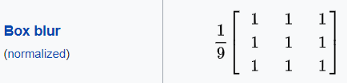

In [ ]:
kernel = np.ones((3, 3), np.float32) / 9 # box filter

In [ ]:
kernel

In [ ]:
convolvedImg = cv2.filter2D(img, -1, kernel)
ax = plt.subplot(121)
plt.imshow(img)
ax = plt.subplot(122)
plt.imshow(convolvedImg)

# fig, ax = plt.subplots(1, figsize=(12,8))
# plt.imshow(convolvedImg)

Now, lets try a a sharpen kernel

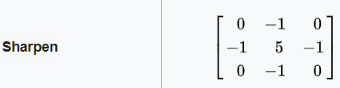

In [ ]:
kernel = np.array([[0, 0, -1, 0, 0],
                   [0, -1, 5, -1,0],
                   [0, 0, -1, 0, 0]])

In [ ]:
convolvedImg = cv2.filter2D(img, -1, kernel)
# fig, ax = plt.subplots(1, figsize=(12,8))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(convolvedImg)

# plt.imshow(convolvedImg)

In [ ]:
# easy way using internal function of openCV
# let's try box filter to blur the image
convolvedImg = cv2.blur(img, (5,5))
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(convolvedImg)

In [ ]:
# Gaussian & median blurring?

fig, ax = plt.subplots(1, figsize=(12,16))
ax = plt.subplot(121)
gaussianFilter = cv2.GaussianBlur(img, (3,3), 0)
plt.imshow(gaussianFilter)
ax = plt.subplot(122)
medianFilter = cv2.medianBlur(img, 3)
plt.imshow(medianFilter)

# Edge Detection

In [ ]:
# canny
%matplotlib inline
import numpy as np
import cv2 
from matplotlib import pyplot as plt

img_original = cv2.imread('ronaldo.jpg',0)
img_gaussian = cv2.GaussianBlur(img_original,(3,3),0)

fig, ax = plt.subplots(1, figsize=(12,20))
ax = plt.subplot(121),plt.imshow(img_original,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# CANNY
cannyOut = cv2.Canny(img_gaussian,60,300)
ax = plt.subplot(122),plt.imshow(cannyOut,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])


fig, ax = plt.subplots(1, figsize=(12,20))
# SOBEL
sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=3)
sobelOut = sobelx + sobely
ax = plt.subplot(121),plt.imshow(sobelOut,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])


# PREWITT
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
prewittOut = img_prewittx + img_prewitty
ax = plt.subplot(122),plt.imshow(prewittOut,cmap = 'gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])


In [ ]:
import numpy as np

np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

In [ ]:
#Using slider

import cv2
#Load image
img_original=cv2.imread('ronaldo.jpg',0)
# 
cv2.namedWindow('thresh')
#definition callback function
def nothing(x):
    pass
#Create two sliders to control threshold1 and threshold2 respectively.
cv2.createTrackbar('threshold1','thresh',50,400,nothing)
cv2.createTrackbar('threshold2','thresh',100,400,nothing)
while(1):
    #return the value of the position of the slider
    threshold1=cv2.getTrackbarPos('threshold1','thresh')
    threshold2=cv2.getTrackbarPos('threshold2','thresh')
    #CannyEdge Detection
    img_edges=cv2.Canny(img_original,threshold1,threshold2)
    #display image
    cv2.imshow('original',img_original)
    cv2.imshow('Canny',img_edges)  
    if cv2.waitKey(1)==ord('q'):
        break
cv2.destroyAllWindows()


## Hough Transform

- edges: Output of the edge detector.
- lines: A vector to store the coordinates of the start and end of the line.
- rho: The resolution parameter \rho in pixels.
- theta: The resolution of the parameter \theta in radians.
- threshold: The minimum number of intersecting points to detect a line.

- lines = cv2.HoughLines(edges,1,np.pi/180,5)

In [ ]:
import cv2
import numpy as np
import sys

def onTrackbarChange(max_slider):
    global img
    global dst
    global gray

    dst = np.copy(img)

    th1 = max_slider 
    th2 = th1 * 0.4
    edges = cv2.Canny(img, th1, th2)

    # Apply probabilistic hough line transform
    lines = cv2.HoughLinesP(edges, 2, np.pi/180.0, 50, minLineLength=10, maxLineGap=100)

    # Draw lines on the detected points
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(dst, (x1, y1), (x2, y2), (0,0,255), 1)

    cv2.imshow("Result Image", dst)	
    cv2.imshow("Edges",edges)

if __name__ == "__main__":

    # Read image
    img = cv2.imread('lane.jpg')
    
    # Create a copy for later usage
    dst = np.copy(img)

    # Convert image to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Create display windows
    cv2.namedWindow("Edges")
    cv2.namedWindow("Result Image")
      

    # Initialize threshold value
    initThresh = 500

    # Maximum threshold value
    maxThresh = 1000

    cv2.createTrackbar("threshold", "Result Image", initThresh, maxThresh, onTrackbarChange)
    onTrackbarChange(initThresh)

    while True:
        if cv2.waitKey(1)==ord('q'):
            break

    cv2.destroyAllWindows()


## Harris Corner

cv.cornerHarris(gray,2,3,0.04)
- img - Input image. It should be grayscale and float32 type.
- blockSize - It is the size of neighbourhood considered for corner detection
- ksize - Aperture parameter of the Sobel derivative used.
- k - Harris detector free parameter in the equation.

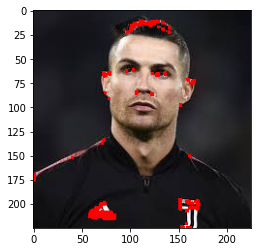

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

filename = 'ronaldo.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255] # replace the corner pixels to RED
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)

# cv.imshow('dst',img)
# if cv.waitKey(0) & 0xff == 27:
#     cv.destroyAllWindows()

## SIFT

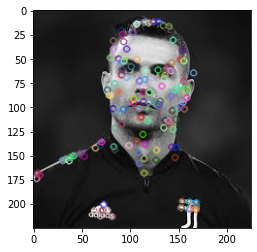

In [3]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img1 = cv2.imread('ronaldo.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

In [4]:
descriptors_1.shape

(153, 128)

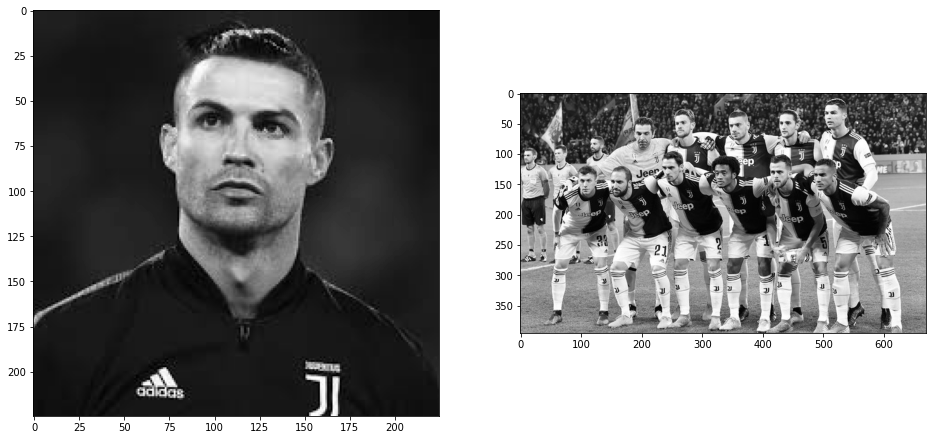

In [5]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('ronaldo.jpg')  
img2 = cv2.imread('juventus.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 20))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

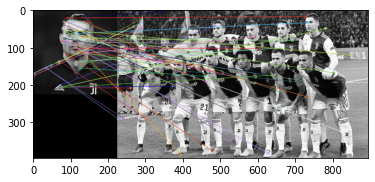

In [6]:
#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
figure, ax =plt.imshow(img3),plt.show()

In [8]:
descriptors_1.shape

(153, 128)

### Haar Cascade

In [ ]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

img = cv2.imread('ronaldo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [ ]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### HOG

In [ ]:
#importing required libraries
# install scikit-image first using conda install scikit-image
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline


#reading the image
img = imread('ronaldo.jpg')
imshow(img)

In [ ]:
#creating hog features 
hog_features, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(16, 16), visualize=True, multichannel=True)

In [ ]:
img.shape

In [ ]:
hog_features.shape

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

### LBP

In [ ]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
   
      
def get_pixel(img, center, x, y): 
      
    new_value = 0
      
    try: 
        # If local neighbourhood pixel  
        # value is greater than or equal 
        # to center pixel values then  
        # set it to 1 
        if img[x][y] >= center: 
            new_value = 1
              
    except: 
        # Exception is required when  
        # neighbourhood value of a center 
        # pixel value is null i.e. values 
        # present at boundaries. 
        pass
      
    return new_value 
   
# Function for calculating LBP 
def lbp_calculated_pixel(img, x, y): 
   
    center = img[x][y] 
   
    val_ar = [] 
      
    # top_left 
    val_ar.append(get_pixel(img, center, x-1, y-1)) 
      
    # top 
    val_ar.append(get_pixel(img, center, x-1, y)) 
      
    # top_right 
    val_ar.append(get_pixel(img, center, x-1, y + 1)) 
      
    # right 
    val_ar.append(get_pixel(img, center, x, y + 1)) 
      
    # bottom_right 
    val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
      
    # bottom 
    val_ar.append(get_pixel(img, center, x + 1, y)) 
      
    # bottom_left 
    val_ar.append(get_pixel(img, center, x + 1, y-1)) 
      
    # left 
    val_ar.append(get_pixel(img, center, x, y-1)) 
       
    # Now, we need to convert binary 
    # values to decimal 
    power_val = [1, 2, 4, 8, 16, 32, 64, 128] 
   
    val = 0
      
    for i in range(len(val_ar)): 
        val += val_ar[i] * power_val[i] 
          
    return val 
   
img_bgr = cv2.imread('ronaldo.jpg')

height, width, _ = img_bgr.shape 
   
# We need to convert RGB image  
# into gray one because gray  
# image has one channel only. 
img_gray = cv2.cvtColor(img_bgr, 
                        cv2.COLOR_BGR2GRAY) 
   
# Create a numpy array as  
# the same height and width  
# of RGB image 
img_lbp = np.zeros((height, width), 
                   np.uint8) 
   
for i in range(0, height): 
    for j in range(0, width): 
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j) 
  
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
plt.imshow(img) 
plt.show() 
   
plt.imshow(img_lbp, cmap ="gray") 
plt.show() 
   
print("LBP Program is finished") 

### Image Classification (using HOG + SVM)

1. Import and define functions for SVM

In [ ]:
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
import random
import pickle
import cv2
import os

2) Load train dataset & calculate HOG

In [ ]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog

# initialize the data and labels
print("[INFO] loading images...")

train_path = 'D:/IIUM_PC/1. TEACHING/6. SEM1_2021/MV/code/fruit_dataset/train'

# grab the image paths and randomly shuffle them
import os

trainPaths = sorted(list(paths.list_images(train_path)))
random.seed(42)
random.shuffle(trainPaths)

hog_descriptors_train = []
trainlabels = []
# loop over the input images
print("[INFO] extracting HOGs for each image...")
for trainPath in trainPaths:
   # Assuming your images are of equal dimension. If not, you need to resize
    image = imread(trainPath)
    hog_features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(16, 16), visualize=True, multichannel=True)
    hog_descriptors_train.append(hog_features)

    # extract the class label from the image path and update the
    # labels list
    label = trainPath.split(os.path.sep)[-2]
    trainlabels.append(label)

In [ ]:
type(hog_descriptors_train)

In [ ]:
# squeeze the list into a numpy array
hog_descriptors_train = np.squeeze(hog_descriptors_train)

In [ ]:
print(hog_descriptors_train.shape)

In [ ]:
type(trainlabels)

In [ ]:
# convert the list into a numpy array
trainlabels = np.array(trainlabels)
print(trainlabels)

In [ ]:
import sklearn
from sklearn import preprocessing

# normalize the data
# hog_descriptors_train = preprocessing.normalize(hog_descriptors_train, norm='l2')
# hog_descriptors_train = preprocessing.scale(hog_descriptors_train)

In [ ]:
# Do the same for testing data
print("[INFO] loading images...")

test_path = 'D:/IIUM_PC/1. TEACHING/6. SEM1_2021/MV/code/fruit_dataset/validation'

testPaths = sorted(list(paths.list_images(test_path)))
random.seed(43)
random.shuffle(testPaths)

hog_descriptors_test = []
testlabels = []
# loop over the input images
for testPath in testPaths:
   # Assuming your images are of equal dimension. If not, you need to resize
    image = imread(testPath)
    hog_features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(16, 16), visualize=True, multichannel=True)
    hog_descriptors_test.append(hog_features)

    # extract the class label from the image path and update the
    # labels list
    label = testPath.split(os.path.sep)[-2]
    testlabels.append(label)
    
# squeeze the list into a matrix array
hog_descriptors_test = np.squeeze(hog_descriptors_test)
# normalize the data
# hog_descriptors_test  = preprocessing.normalize(hog_descriptors_test , norm='l2')

In [ ]:
hog_descriptors_test.shape

In [ ]:
print(len(testlabels))
testlabels = np.array(testlabels)

In [ ]:
testlabels.shape

5) SVM

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# training a linear SVM
lin_svm = SVC(kernel = 'linear', C=1E10).fit(hog_descriptors_train, trainlabels)

In [ ]:
lin_svm_predicted_mc = lin_svm.predict(hog_descriptors_test)
lin_confusion_mc = confusion_matrix(testlabels, lin_svm_predicted_mc)
df_cm = pd.DataFrame(lin_confusion_mc, 
                     index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

In [ ]:
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(testlabels, 
                                                                       lin_svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
# SVM with Radial Basis Function (RBF) 
svm = SVC(kernel = 'rbf', gamma='auto').fit(hog_descriptors_train, trainlabels)
svm_predicted_mc = svm.predict(hog_descriptors_test)
confusion_mc = confusion_matrix(testlabels, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,3)],
                  columns = [i for i in range(0,3)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(testlabels, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
svm.score(hog_descriptors_train, trainlabels)

In [ ]:
from sklearn.metrics import classification_report

print('\n Classification report for Linear SVM\n\n\n',
      classification_report(testlabels, lin_svm_predicted_mc))    

In [ ]:
print('\n Classification report for SVM with RBF kernel\n\n\n', 
      classification_report(y_test_mc, svm_predicted_mc))